In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
train=pd.read_csv('D:\\Gandhi\\Machine Learning\\Datasets\\Bigmart_sales\\Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.shape

(8523, 12)

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
numerical=train.select_dtypes(['float64','int64']).columns
categorical=train.select_dtypes(['object']).columns

print("Numerical fratures:",numerical)
print("Categorical features",categorical)

Numerical fratures: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')
Categorical features Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
corr=train.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


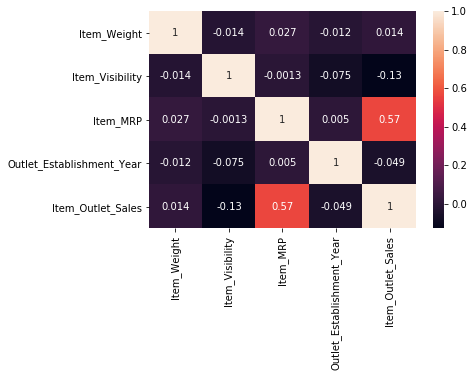

In [9]:
sn.heatmap(corr,annot=True)

In [11]:
a=train['Item_Weight'].mean()
a

12.857645184136183

In [12]:
train['Item_Weight']=train['Item_Weight'].fillna(a)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


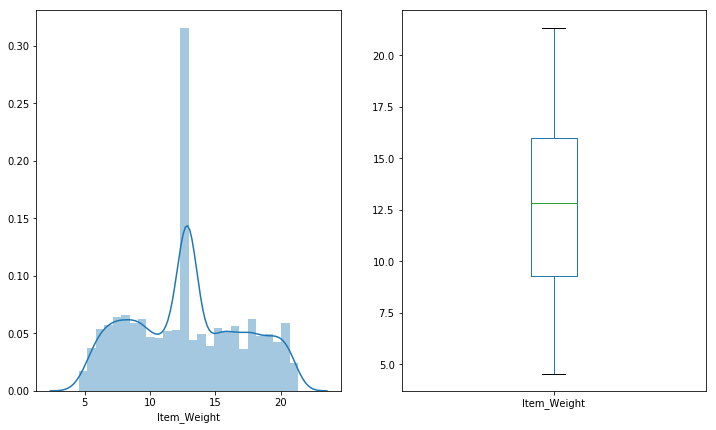

In [13]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Item_Weight'])

plt.subplot(122)
train['Item_Weight'].plot.box(figsize=(12,7))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


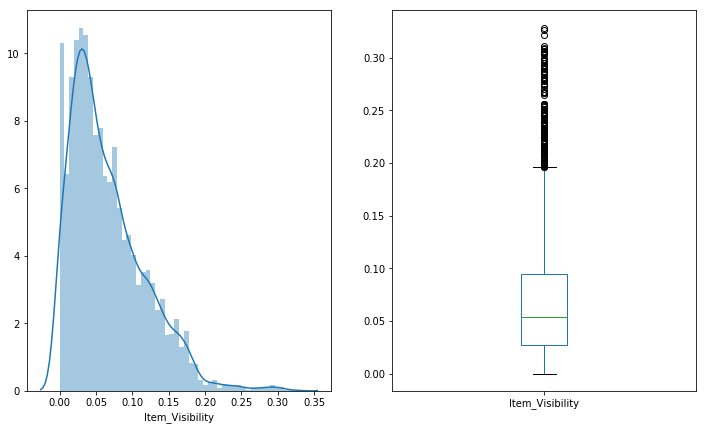

In [14]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Item_Visibility'])

plt.subplot(122)
train['Item_Visibility'].plot.box(figsize=(12,7))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


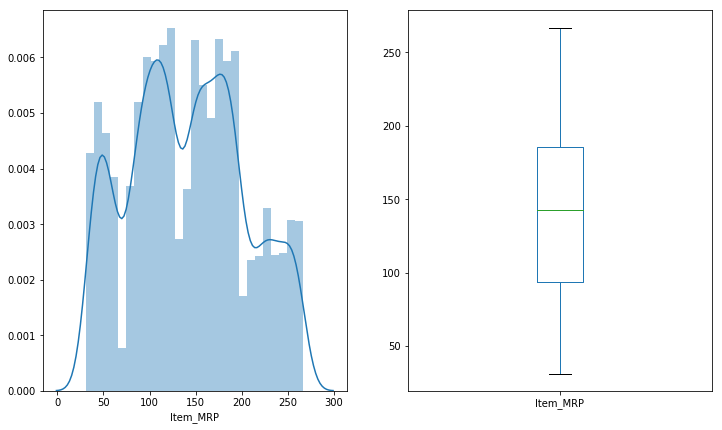

In [15]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Item_MRP'])

plt.subplot(122)
train['Item_MRP'].plot.box(figsize=(12,7))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


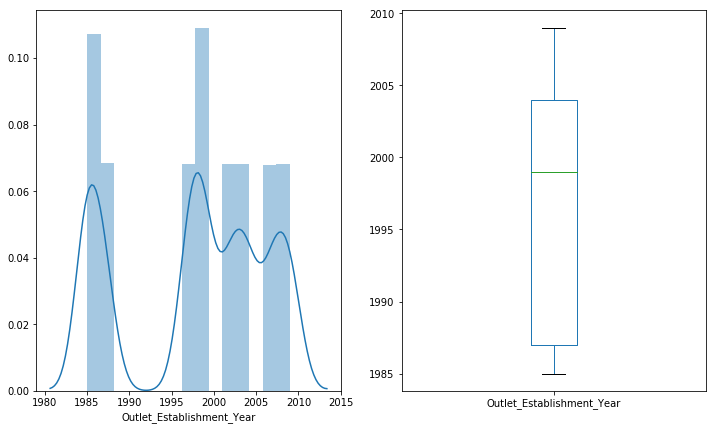

In [16]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Outlet_Establishment_Year'])

plt.subplot(122)
train['Outlet_Establishment_Year'].plot.box(figsize=(12,7))
plt.show()

In [17]:
categorical

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

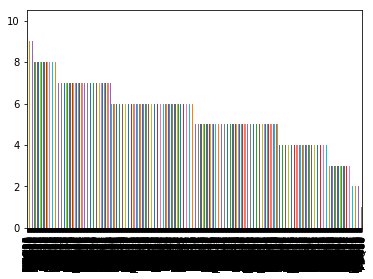

In [18]:
train['Item_Identifier'].value_counts().plot.bar()

In [27]:
for i in train.columns:
    if (train[i].dtype=='object'):
        print (train[i].value_counts())

FDW13    10
FDG33    10
NCQ06     9
FDW26     9
NCI54     9
FDV60     9
FDO19     9
FDF52     9
FDT07     9
NCJ30     9
FDF56     9
FDD38     9
FDP25     9
NCY18     9
FDG09     9
FDW49     9
NCF42     9
FDX04     9
FDQ40     9
FDX20     9
FDV38     9
NCL31     9
FDU12     9
DRN47     9
FDX31     9
DRE49     9
NCB18     9
FDR48     8
FDS33     8
DRK12     8
         ..
NCS41     2
NCW05     2
FDD48     2
DRC24     2
NCC55     2
NCX53     2
FDA48     2
FDF38     2
FDD22     2
FDI36     2
FDW58     2
FDR57     2
NCM42     2
FDP15     2
FDZ50     2
FDE38     2
FDU43     2
FDT33     2
FDW10     2
NCG19     2
DRE01     2
DRF48     1
FDK57     1
FDE52     1
FDO33     1
FDT35     1
FDY43     1
FDN52     1
FDC23     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Food

In [28]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [82]:
train['Item_Identifier']=train['Item_Identifier'].apply(lambda x:x[0:2])
train['Item_Identifier']=train['Item_Identifier'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
train('Item_Identifier').value_counts()

TypeError: 'float' object is not subscriptable

In [83]:
#Get the first two characters of ID:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

TypeError: 'float' object is not subscriptable